## I & I

In [1]:
import os,sys
ROOT_DIR = os.path.abspath("../")
sys.path.append(ROOT_DIR)  # To find local version of the library

In [2]:
cd ..

/home/gidi/nbs/RoadTrackACC


In [3]:
import pandas as pd
import numpy as np
import glob
from collections import Counter
from datetime import datetime
from matplotlib import pyplot as plt
import seaborn as sb
import datetime
import itertools

from sklearn.metrics import confusion_matrix
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, KFold

from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import confusion_matrix as cm

% matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# add auto relaod
%load_ext autoreload
% autoreload 2
from utils import *
from detect_peaks import detect_peaks
    
from sklearn_porter import Porter

Load and examine data from Mexica

## Load Data

In [42]:
f = glob.glob('data/*.xlsx')
f

['data/Acc_Data_0805.xlsx',
 'data/Acc_Data_Tow_1605.xlsx',
 'data/standStillUphill.xlsx',
 'data/Acc_Data_0205.xlsx',
 'data/Acc_Data_Toyota_2604.xlsx',
 'data/Acc_Data_180518_Mexico.xlsx',
 'data/standStillDownHill.xlsx',
 'data/Acc_Test_240418.xlsx',
 'data/Acc_Data_040618.xlsx',
 'data/Acc_Data_Tow_1005.xlsx',
 'data/BUMPERS.xlsx',
 'data/Acc_Data_0305.xlsx',
 'data/standStillFlat.xlsx']

In [40]:
f

'data/Acc_Data_180518_Mexico.xlsx'

In [43]:

loader = DataLoader()
loader.load_data([f[8]]) # Mexica first file
big_df=loader.big_df

Loading file:data/Acc_Data_040618.xlsx
Acc_Data_040618.xlsx ZigZag1
Acc_Data_040618.xlsx ZigZag2
Acc_Data_040618.xlsx ZigZag3
Acc_Data_040618.xlsx LowBumper1
Acc_Data_040618.xlsx LowBumper2
Acc_Data_040618.xlsx LowBumper3
Acc_Data_040618.xlsx HighBumber1
error in sheet above. Check experiment log
Acc_Data_040618.xlsx HighBumper2
Acc_Data_040618.xlsx HighBumper3


In [44]:
event='bumper'

In [45]:
anot_file = 'data/Roadtrack_tags - Acc_Data_240418.csv'

anot = pd.read_csv(anot_file)
    
events = anot[anot.event==event]
# fit date time format. first workout hard stops
events['start time']=pd.to_datetime(events['start time'])
events['end time']=pd.to_datetime(events['end time'])

Index(['file', 'sheet', 'event', 'start time', 'end time', 'start row',
       'end row', 'date'],
      dtype='object')

In [51]:
event_list=[]
first_second_stop = []
for row in events.iterrows():
    i=0
    time = row[1]['start time']
    first_second_stop.append(time)
    while time >= row[1]['start time'] and time<=row[1]['end time']:
        event_list.append(time)
        time=row[1]['start time']+datetime.timedelta(0,i) 
        i+=1

In [57]:
min(big_df.time_sec),max(big_df.time_sec)

(Timestamp('2018-06-07 15:11:21'), Timestamp('2018-06-07 16:12:53'))

In [58]:
# set hard stops annotations
big_df[event]=0
big_df[event][(big_df.cat_id==4)&(big_df.time_sec.isin(event_list))]=1
#big_df[event][(big_df.cat_id==5)&(big_df.time_sec.isin(first_second_stop))]=2

In [59]:
Counter(big_df[event])

Counter({0: 55127, 1: 3260})

## Plot events

1900


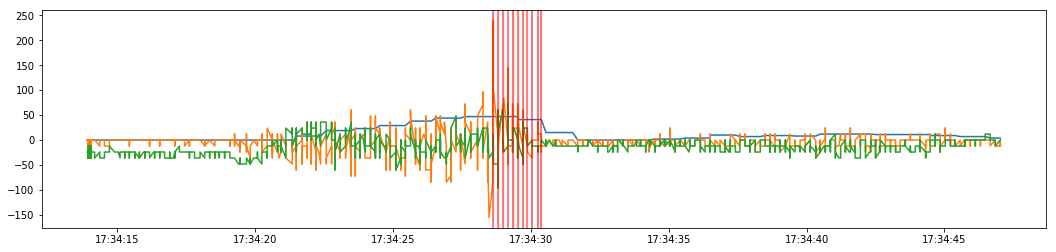

3014


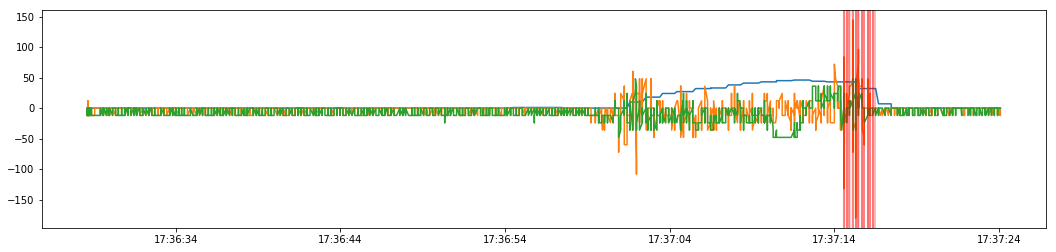

2519


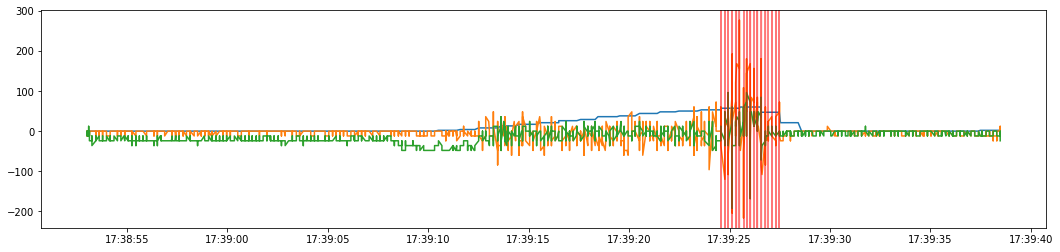

In [34]:
# event. plot
event_col='hard_stop_on'
event_cats=[5]
for r in big_df[big_df['cat_id'].isin(event_cats)][['sheet','file']].drop_duplicates().iterrows():
    sheet=r[1]['sheet']
    file=r[1]['file']

    fig,ax = plt.subplots(figsize=(18,4))
    df = big_df[(big_df['cat_id'].isin(event_cats))&(big_df.sheet==sheet)&(big_df.file==file)]

    print(len(df))
    ax.plot(df.index, df['Speed'])
    ax.plot(df.index, df['Vertical'])
    ax.plot(df.index, df['Forward'])
    #ax.set_title(sheet+' '+df['file'].iloc[0])
    for i,bump in enumerate(df[event_col][df[event_col]==1].iteritems()):
        ax.axvline(x=bump[0], color='r',alpha=0.1)

    #f = thresholding_algo(df.Vertical,400,10,0.7)
    #fig,ax = plt.subplots(figsize=(18,4))
    #ax.plot(f['signals'])
    plt.show()